# CNN-3
- Dataset: EMNIST ByClass
- Model: CNN ()
- Batch Size: 2048
- Output Layer: 62 classes
- Accuracy

In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

BATCH_SIZE = 2048
ds_train = ds_train.map(preprocess).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(62, activation='softmax')  # 62 classes for EMNIST ByClass
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/10


2025-07-11 16:06:14.212299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-11 16:06:14.378874: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


341/341 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.4594 - loss: 2.1414 - val_accuracy: 0.7814 - val_loss: 0.6731
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7652 - loss: 0.7306 - val_accuracy: 0.8107 - val_loss: 0.5652
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.7936 - loss: 0.6255 - val_accuracy: 0.8212 - val_loss: 0.5272
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.8056 - loss: 0.5805 - val_accuracy: 0.8278 - val_loss: 0.5009
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.8133 - loss: 0.5544 - val_accuracy: 0.8311 - val_loss: 0.4871
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.8179 - loss: 0.5367 - val_accuracy: 0.8353 - val_loss: 0.4750
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.8218 - loss: 0.5222 - val_accuracy: 0.8377 - val_loss: 0.4662
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.8251 - loss: 0.5120 - val_accurac

In [8]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

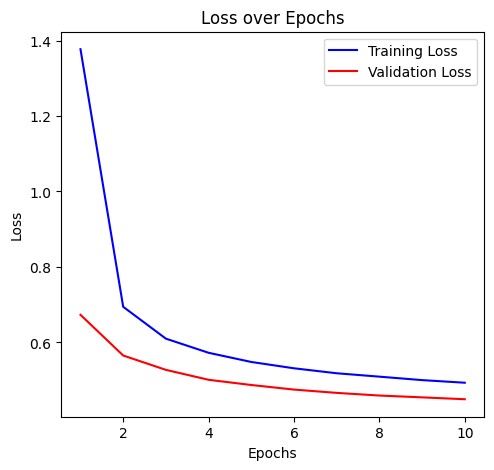

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

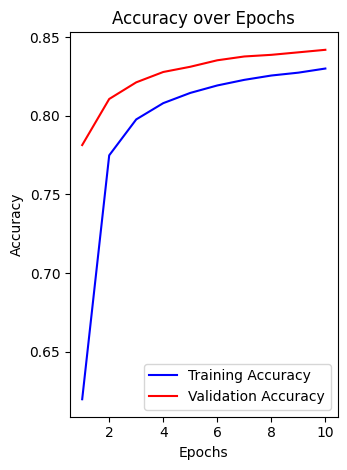

In [10]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()